# Similitud coseno


La similitud coseno es una medida de la similitud existente entre dos vectores en un espacio que posee un producto interior con el que se evalúa el valor del coseno del ángulo comprendido entre ellos. Esta función trigonométrica proporciona un valor igual a 1 si el ángulo comprendido es cero, es decir si ambos vectores apuntan a un mismo lugar. Cualquier ángulo existente entre los vectores, el coseno arrojaría un valor inferior a uno. Si los vectores fuesen ortogonales el coseno se anularía, y si apuntasen en sentido contrario su valor sería -1. De esta forma, el valor de esta métrica se encuentra entre -1 y 1, es decir en el intervalo cerrado [-1,1].

Esta distancia se emplea frecuentemente en la búsqueda y recuperación de información representando las palabras (o documento) en un espacio vectorial. En minería de textos se aplica la similitud coseno con el objeto de establecer una métrica de semejanza entre textos. En minería de datos se suele emplear como un indicador de cohesión de clústeres de textos. La similitud coseno no debe ser considerada como una métrica debido a que no cumple la desigualdad triangular.

Un enfoque comúnmente utilizado para unir documentos similares se basa en contar el número máximo de palabras comunes entre los documentos.

Pero este enfoque tiene un defecto inherente. Es decir, a medida que aumenta el tamaño del documento, el número de palabras comunes tiende a aumentar incluso si los documentos hablan de diferentes temas.

La similitud del coseno ayuda a superar este defecto fundamental en el enfoque de "distancia de palabras comunes" o distancia euclidiana.


# ¿Cual es la ventaja?


La similitud de coseno es una métrica utilizada para determinar qué tan similares son los documentos, independientemente de su tamaño.

Matemáticamente, mide el coseno del ángulo entre dos vectores proyectados en un espacio multidimensional. En este contexto, los dos vectores son matrices que contienen la frecuencia  de palabras de dos documentos.

Como métrica de similitud, ¿cómo difiere el algoritmo del número de palabras comunes?

Cuando se traza en un espacio multidimensional, donde cada dimensión corresponde a una palabra en el documento, la similitud del coseno captura la orientación (el ángulo) de los documentos y no la magnitud. Si se desea la magnitud, se puede calcular la distancia euclidiana en su lugar.

La similitud  coseno es ventajosa porque incluso si los dos documentos similares están muy separados por la distancia euclidiana debido al tamaño (como, la palabra 'grillo' apareció 50 veces en un documento y 10 veces en otro) aún podrían tener un ángulo más pequeño entre ellos. Cuanto menor es el ángulo, mayor es la similitud.

# Ejemplo de similitud de coseno

Supongamos que se tiene 3 documentos basados en un par de  jugadores de cricket estrella: Sachin, Tendulkar y Dhoni. Dos de los documentos (A) y (B) son de las páginas de wikipedia en los respectivos jugadores y el tercer documento (C) es un fragmento más pequeño de la página de Wikipedia de Dhoni.

<img src='cs2.png'>


Como se puede ver, los tres documentos están conectados por un tema común: el juego de Cricket.

Nuestro objetivo es estimar cuantitativamente la similitud entre los documentos. Para facilitar la comprensión, consideremos solo las 3 palabras más comunes entre los documentos: 'Dhoni', 'Sachin' y 'Cricket'. Es de esperar que  A y  C , es decir, los dos documentos en Dhoni tengan una mayor similitud con  A y  B , porque,  C es esencialmente un fragmento del de  A. Sin embargo, si vamos por el número de palabras comunes, los dos documentos más grandes tendrán las palabras más comunes y, por lo tanto, se considerán más similares, que es exactamente lo que queremos evitar. Los resultados serían más congruentes cuando utilizamos el puntaje de similitud de coseno para evaluar la similitud.


Proyectemos los documentos en un espacio tridimensional, donde cada dimensión es un recuento de frecuencia de: 'Sachin', 'Dhoni' o 'Cricket'. Cuando se traza en este espacio, los 3 documentos aparecerían algo así.

<img src='cs3.png'>

Como se puede ver, el Documento de  Dhoni_Small y el Documento Dhoni principal están orientados más juntos en el espacio tridimensional, a pesar de que están muy separados por magnitud.

Resulta que cuanto más cerca están los documentos por ángulo, mayor es la similitud de coseno.

<img src='fcs.png'>


A medida que incluye más palabras del documento, es más difícil visualizar un espacio dimensional superior. Pero puede calcular directamente la similitud del coseno utilizando esta fórmula matemática.

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
%config IPCompleter.greedy=True



In [6]:
vec1 = np.array([[1,1,0,1,1]])
vec2 = np.array([[0,1,0,1,1]])

In [7]:
print(cosine_similarity(vec1, vec2))

[[0.8660254]]


In [8]:
#Defenimos la data
tw1 = "Realizarán patrullajes de vigilancia en distintos puntos de la ciudad; se quedarán el tiempo que sea necesario hasta que la tranquilidad se restablezca" 
nt1 = "Con el objetivo de reforzar la protección a la población civil, un contingente de 230 elementos de la Secretaría de la Defensa Nacional (Sedena) arribó la noche de este viernes a Culiacán, luego del violento episodio ocurrido el pasado jueves 17 de octubre." 
tw2 = "Personal del #EjércitoyFAM perteneciente al 22/o. Batallón de Infantería en coordinación con autoridades municipales llevaron a cabo la campaña “Canje de Armas de Fuego por Vales de Despensa” en el municipio de Los Aldama," 
tw3 = "La @SEDENAmx despliega a 230 elementos para reforzar la seguridad en Culiacán, luego de la jornada violenta que terminó en la liberación de Ovidio Guzmán, uno de los hijos de El Chapo."
tw4 = "Jupyter Notebook is an open-source, interactive web application that allows you to write and run "
twits = [tw1, nt1, tw2, tw3, tw4] 

In [9]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Crear tabla de frecuencias
count_vectorizer = CountVectorizer(stop_words='spanish')
count_vectorizer = CountVectorizer()
matrix = count_vectorizer.fit_transform(twits)


# utilizacion de pandas para generar la matriz de frecuencias 
data_matrix = matrix.todense()
frecuencias = pd.DataFrame(data_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=['tw1', 'nt1', 'tw2', 'tw3', 'tw4'])
frecuencias

17  22  230  al  aldama  allows  an  and  application  armas  ...  un  \
tw1   0   0    0   0       0       0   0    0            0      0  ...   0   
nt1   1   0    1   0       0       0   0    0            0      0  ...   1   
tw2   0   1    0   1       1       0   0    0            0      1  ...   0   
tw3   0   0    1   0       0       0   0    0            0      0  ...   0   
tw4   0   0    0   0       0       1   1    1            1      0  ...   0   

     uno  vales  viernes  vigilancia  violenta  violento  web  write  you  
tw1    0      0        0           1         0         0    0      0    0  
nt1    0      0        1           0         0         1    0      0    0  
tw2    0      1        0           0         0         0    0      0    0  
tw3    1      0        0           0         1         0    0      0    0  
tw4    0      0        0           0         0         0    1      1    1  

[5 rows x 98 columns]

In [10]:
frecuencias.loc["tw1":"tw2", "17":"batallon"]

17  22  230  al  aldama  allows  an  and  application  armas  arribó  \
tw1   0   0    0   0       0       0   0    0            0      0       0   
nt1   1   0    1   0       0       0   0    0            0      0       1   
tw2   0   1    0   1       1       0   0    0            0      1       0   

     autoridades  
tw1            0  
nt1            0  
tw2            1

In [11]:
frecuencias.loc['tw1',:].head(40)

17              0
22              0
230             0
al              0
aldama          0
allows          0
an              0
and             0
application     0
armas           0
arribó          0
autoridades     0
batallón        0
cabo            0
campaña         0
canje           0
chapo           0
ciudad          1
civil           0
con             0
contingente     0
coordinación    0
culiacán        0
de              2
defensa         0
del             0
despensa        0
despliega       0
distintos       1
ejércitoyfam    0
el              1
elementos       0
en              1
episodio        0
este            0
fuego           0
guzmán          0
hasta           1
hijos           0
infantería      0
Name: tw1, dtype: int64

In [14]:
salida = cosine_similarity(frecuencias, frecuencias)

In [15]:
salida

array([[1.        , 0.44698085, 0.36326961, 0.49957537, 0.        ],
       [0.44698085, 1.        , 0.5453079 , 0.7004728 , 0.        ],
       [0.36326961, 0.5453079 , 1.        , 0.53579972, 0.        ],
       [0.49957537, 0.7004728 , 0.53579972, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

In [9]:
count_vectorizer.get_feature_names()

['17',
 '22',
 '230',
 'al',
 'aldama',
 'armas',
 'arribó',
 'autoridades',
 'batallón',
 'cabo',
 'campaña',
 'canje',
 'chapo',
 'ciudad',
 'civil',
 'con',
 'contingente',
 'coordinación',
 'culiacán',
 'de',
 'defensa',
 'del',
 'despensa',
 'despliega',
 'distintos',
 'ejércitoyfam',
 'el',
 'elementos',
 'en',
 'episodio',
 'este',
 'fuego',
 'guzmán',
 'hasta',
 'hijos',
 'infantería',
 'jornada',
 'jueves',
 'la',
 'liberación',
 'llevaron',
 'los',
 'luego',
 'municipales',
 'municipio',
 'nacional',
 'necesario',
 'noche',
 'objetivo',
 'octubre',
 'ocurrido',
 'ovidio',
 'para',
 'pasado',
 'patrullajes',
 'personal',
 'perteneciente',
 'población',
 'por',
 'protección',
 'puntos',
 'que',
 'quedarán',
 'realizarán',
 'reforzar',
 'restablezca',
 'se',
 'sea',
 'secretaría',
 'sedena',
 'sedenamx',
 'seguridad',
 'terminó',
 'tiempo',
 'tranquilidad',
 'un',
 'uno',
 'vales',
 'viernes',
 'vigilancia',
 'violenta',
 'violento']

In [10]:
count_vectorizer.vocabulary_

{'realizarán': 63,
 'patrullajes': 54,
 'de': 19,
 'vigilancia': 79,
 'en': 28,
 'distintos': 24,
 'puntos': 60,
 'la': 38,
 'ciudad': 13,
 'se': 66,
 'quedarán': 62,
 'el': 26,
 'tiempo': 73,
 'que': 61,
 'sea': 67,
 'necesario': 46,
 'hasta': 33,
 'tranquilidad': 74,
 'restablezca': 65,
 'con': 15,
 'objetivo': 48,
 'reforzar': 64,
 'protección': 59,
 'población': 57,
 'civil': 14,
 'un': 75,
 'contingente': 16,
 '230': 2,
 'elementos': 27,
 'secretaría': 68,
 'defensa': 20,
 'nacional': 45,
 'sedena': 69,
 'arribó': 6,
 'noche': 47,
 'este': 30,
 'viernes': 78,
 'culiacán': 18,
 'luego': 42,
 'del': 21,
 'violento': 81,
 'episodio': 29,
 'ocurrido': 50,
 'pasado': 53,
 'jueves': 37,
 '17': 0,
 'octubre': 49,
 'personal': 55,
 'ejércitoyfam': 25,
 'perteneciente': 56,
 'al': 3,
 '22': 1,
 'batallón': 8,
 'infantería': 35,
 'coordinación': 17,
 'autoridades': 7,
 'municipales': 43,
 'llevaron': 40,
 'cabo': 9,
 'campaña': 10,
 'canje': 11,
 'armas': 5,
 'fuego': 31,
 'por': 58,
 'vale

In [11]:
frecuencias.columns.tolist()

['17',
 '22',
 '230',
 'al',
 'aldama',
 'armas',
 'arribó',
 'autoridades',
 'batallón',
 'cabo',
 'campaña',
 'canje',
 'chapo',
 'ciudad',
 'civil',
 'con',
 'contingente',
 'coordinación',
 'culiacán',
 'de',
 'defensa',
 'del',
 'despensa',
 'despliega',
 'distintos',
 'ejércitoyfam',
 'el',
 'elementos',
 'en',
 'episodio',
 'este',
 'fuego',
 'guzmán',
 'hasta',
 'hijos',
 'infantería',
 'jornada',
 'jueves',
 'la',
 'liberación',
 'llevaron',
 'los',
 'luego',
 'municipales',
 'municipio',
 'nacional',
 'necesario',
 'noche',
 'objetivo',
 'octubre',
 'ocurrido',
 'ovidio',
 'para',
 'pasado',
 'patrullajes',
 'personal',
 'perteneciente',
 'población',
 'por',
 'protección',
 'puntos',
 'que',
 'quedarán',
 'realizarán',
 'reforzar',
 'restablezca',
 'se',
 'sea',
 'secretaría',
 'sedena',
 'sedenamx',
 'seguridad',
 'terminó',
 'tiempo',
 'tranquilidad',
 'un',
 'uno',
 'vales',
 'viernes',
 'vigilancia',
 'violenta',
 'violento']

In [12]:
frecuencias.iloc[2]['aldama']

1

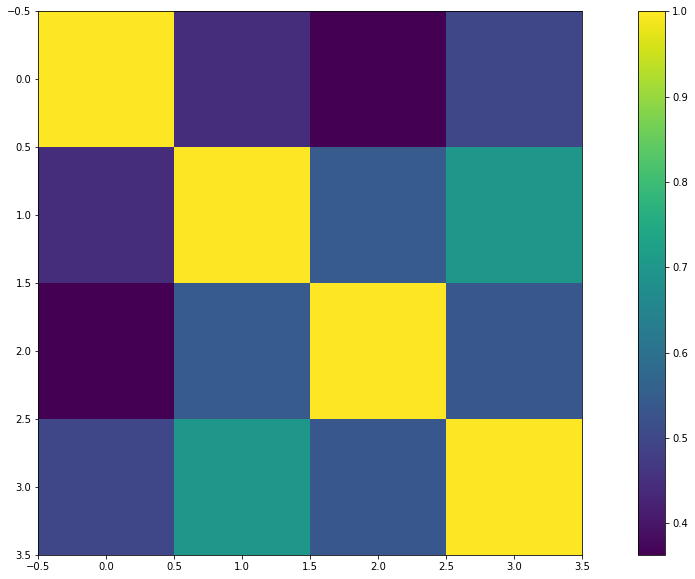

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.imshow(salida)
plt.colorbar()

In [14]:
plt.ylabel(blabla)
plt.show()

NameError: name 'blabla' is not defined